In [1]:
#@title # <font color="red"> Python Setup </font> { display-mode: "form" }

#@markdown <p><img alt="code icon" height="125px" src='https://drive.google.com/uc?id=1dc0uNGWLKE20VjQ8UHg3eE2KZAUx9Ke9' align="center" hspace="0px" vspace="0px"></p>

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

#@markdown <font color="red"><h3><b><i> Begin by running this cell.</i></b></h3> </font>

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

#@markdown ---
!pip install exifread &> /dev/null

import os, sys
if 'google.colab' in str(get_ipython()):
  print('Google Colab Environment - Loading Dependencies...')
  !rm -r ImageSTEM imageSTEAM &> /dev/null
  !git clone https://github.com/ImagingLyceum-ASU/ImageSTEAM.git &> /dev/null
  !mv ImageSTEAM/imageSTEAM ./
  !rm -r ImageSTEAM
else:
  print('Local iPython Environment')
  dir1 = os.path.dirname(os.path.abspath('../../'))
  if not dir1 in sys.path: sys.path.append(dir1)

import imageSTEAM as steam
from imageSTEAM import *
print('Environment Ready!')

Google Colab Environment - Loading Dependencies...
Environment Ready!


# **Introduction**

- What is a pixel value?
- What does it mean to be bright/dark?
- What causes pixels to have their brightness?

#  
<font color="red"> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
</font>



# **Pixel values: 0 - 255**

Let's look at grayscale images and see what their pixel values are.

In [2]:
#@title <font color='green'> Run SinglePixelBrightness Widget </font> { run: "auto", display-mode: "form" }

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout
import matplotlib.pyplot as plt

def pixelBrightnessExample():
  pixel_grid = np.zeros((1,1), dtype='uint8')
  slider = widgets.IntSlider(description='Brightness', value=128, min=0, max=255)

  def _update_display(intensity):
    tmp_img = pixel_grid + intensity

    plt.imshow(tmp_img, cmap='gray', vmin = 0, vmax = 255)
    plt.show()

  preview = widgets.interactive_output(_update_display,
                                       {'intensity': slider})
  final_widget = VBox([preview, slider])
  display(final_widget)

pixelBrightnessExample()

That was just one pixel, now let's see what happens when different pixels are put together. Let's go ahead and change different pixel values (input the pixel coordinates you want, then input the number you want that pixel changed to).

In [3]:
#@title <font color='green'> Run PixelBrightness Widget </font> { run: "auto", display-mode: "form" }

#TODO show a gray scale image. Create a function which displays an image,
# then asks what pixel coordinate tehy want to change to what value, and then updates the new picture
from IPython.display import display, clear_output
def pixelBrightness():
  ## Import example grayscale image
  img_orig = steam.data.amongUs()
  h, w = img_orig.shape[:2]
  # Make copy which will be our working copy so we can reset
  img_edit = img_orig.copy()

  ## User Controls
  # Sliders
  sliderIntensity = widgets.IntSlider(description='Brightness', value=None, min=0, max=255)
  sliderRow = widgets.IntSlider(description='Row', value=None, min=0, max=h-1)
  sliderCol = widgets.IntSlider(description='Column', value=None, min=0, max=w-1)
  sliders = VBox([sliderRow, sliderCol, sliderIntensity])
  # Buttons
  buttonConfirm = widgets.Button(description='Confirm')
  buttonReset = widgets.Button(description='Reset')
  buttons = HBox([buttonConfirm, buttonReset])
  # Combined UI
  ui = VBox([sliders, buttons])

  ## Interactive Image Display
  def _update_display(row, col, intensity, img_edit=img_edit):
    tmp_img = img_edit.copy()
    tmp_img[row, col] = intensity
    utils.display_img(tmp_img, dpi=100)
    # preview.clear_output(wait=True)

  ## Button Functionality
  def _confirm_clicked(b, img_edit=img_edit):
    row, col = sliderRow.value, sliderCol.value
    pix_val = sliderIntensity.value
    img_edit[row, col] = pix_val
    with preview:
      preview.clear_output(wait=True)
    # display(final_widget)
    return img_edit

  def _reset_clicked(b, img_edit=img_edit):
    with preview:
      # utils.display_img(img_orig, title='Img_Orig', dpi=100)
      img_edit = img_orig#.copy()
      # # utils.display_img(img_edit, title='Img_Edit', dpi=100)
      # # clear_output()
      # with preview:
      preview.clear_output(wait=True)
    # display(final_widget)
    return img_edit

  buttonConfirm.on_click(_confirm_clicked)
  buttonReset.on_click(_reset_clicked)

  preview = widgets.interactive_output(_update_display,
                                       {'row': sliderRow, 'col': sliderCol, 'intensity': sliderIntensity})

  ## Final Widget
  final_widget = VBox([preview, ui])
  display(final_widget)
  # display.clear_output()

pixelBrightness()


Challenge: can you make a picture of your favorite food by specifying pixel values



In [4]:
#@title <font color='green'> Run PixelPaint Widget </font> { run: "auto", display-mode: "form" }

# TODO: Start with a blank canvas, have them define pixels (grouped in 3x3 regions), to try and make a "paint" program
def pixelPaint():
  ## Import example grayscale image
  img_orig = np.ones((50,50), dtype='uint8') #steam.data.amongUs()
  h, w = img_orig.shape[:2]
  # Make copy which will be our working copy so we can reset
  img_edit = img_orig.copy()

  ## User Controls
  # Sliders
  sliderIntensity = widgets.IntSlider(description='Brightness', value=None, min=0, max=255)
  sliderRow = widgets.IntSlider(description='Row', value=h//2, min=0, max=h-1)
  sliderCol = widgets.IntSlider(description='Column', value=w//2, min=0, max=w-1)
  sliders = VBox([sliderRow, sliderCol, sliderIntensity])
  # Buttons
  buttonConfirm = widgets.Button(description='Confirm')
  buttonReset = widgets.Button(description='Reset')
  buttons = HBox([buttonConfirm, buttonReset])
  # Combined UI
  ui = VBox([sliders, buttons])

  ## Interactive Image Display
  def _update_display(row, col, intensity, img_edit=img_edit):
    tmp_img = img_edit.copy()
    tmp_img[row, col] = intensity
    utils.display_img(tmp_img, dpi=100)
    # preview.clear_output(wait=True)

  ## Button Functionality
  def _confirm_clicked(b, img_edit=img_edit):
    row, col = sliderRow.value, sliderCol.value
    pix_val = sliderIntensity.value
    img_edit[row, col] = pix_val
    with preview:
      preview.clear_output(wait=True)
    # display(final_widget)
    return img_edit

  def _reset_clicked(b, img_edit=img_edit):
    with preview:
      # utils.display_img(img_orig, title='Img_Orig', dpi=100)
      img_edit = img_orig.copy()
      # # utils.display_img(img_edit, title='Img_Edit', dpi=100)
      # # clear_output()
      # with preview:
      preview.clear_output(wait=True)
    # display(final_widget)
    return img_edit

  buttonConfirm.on_click(_confirm_clicked)
  buttonReset.on_click(_reset_clicked)

  preview = widgets.interactive_output(_update_display,
                                       {'row': sliderRow, 'col': sliderCol, 'intensity': sliderIntensity})

  ## Final Widget
  final_widget = VBox([preview, ui])
  display(final_widget)
  # display.clear_output()

pixelPaint()

# **Tech-Free Lecture: Brightness**

What causes brightness in the real world? How does light reflecting work?


# **Image Brightness**

First, we need to load a gray image in.


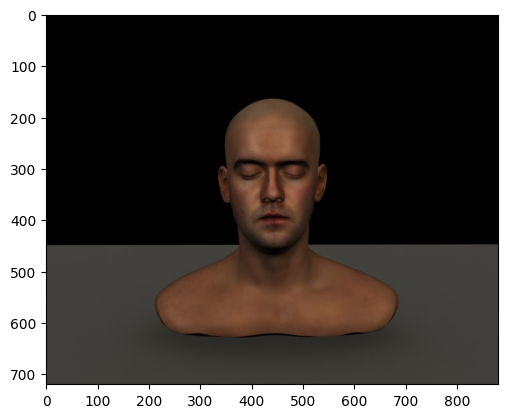

In [5]:
image = steam.data.headScan()[3][:, 200:-200]

display_img(image)

Now let's visualize different brightnesses applied globally to the image.

In [6]:
#@title <font color='green'> Run GlobalBrightness Widget </font> { run: "auto", display-mode: "form" }

# TODO: slider that allows the brightness to change
def adjustBrightness(img):
  pixel_grid = img.astype('float32') / 255.0 #np.zeros((1,1), dtype='uint8')
  slider = widgets.FloatSlider(description='Brightness', value=1, min=0, max=4)

  def _update_display(intensity):
    tmp_img = pixel_grid * intensity

    plt.imshow(np.clip(tmp_img, 0, 1) , cmap='gray', vmin = 0, vmax = 1)
    plt.show()

  preview = widgets.interactive_output(_update_display,
                                       {'intensity': slider})
  final_widget = VBox([preview, slider])
  display(final_widget)

adjustBrightness(img=image)

Can we change the brightness in a non-linear way?


In [7]:
#@title <font color='green'> Run ToneCurve Widget </font> { run: "auto", display-mode: "form" }

#TODO: function that lets them draw a different gamma curve, that then gets applied (NOTE: this might be difficult to implement)
def toneCurve(img):
  from scipy.interpolate import make_interp_spline, BSpline
  img_orig = img
  output_img = widgets.Output()
  ## Sliders
  xSlider1 = widgets.FloatSlider(description='M1:', value=0.25, min=0, max=1.0, step=0.01)
  xSlider2 = widgets.FloatSlider(description='M2:', value=0.50, min=0, max=1.0, step=0.01)
  xSlider3 = widgets.FloatSlider(description='M3:', value=0.75, min=0, max=1.0, step=0.01)
  ySlider1 = widgets.FloatSlider(description='M1', value=0.25, min=0, max=1, step=0.01, orientation='vertical')
  ySlider2 = widgets.FloatSlider(description='M2', value=0.50, min=0, max=1, step=0.01, orientation='vertical')
  ySlider3 = widgets.FloatSlider(description='M3', value=0.75, min=0, max=1, step=0.01, orientation='vertical')
  # Layout
  xSliders = widgets.VBox([xSlider1, xSlider2, xSlider3])
  ySliders = widgets.HBox([ySlider1, ySlider2, ySlider3])
  sliders = widgets.VBox([xSliders, ySliders])
  ## Buttons
  buttonReset = widgets.Button(description='Reset')
  # UI Layout
  ui = widgets.VBox([sliders, buttonReset])

  def _get_curve(x, y):
    """Interpolate marker points to smooth curve"""
    x_out = np.linspace(x.min(), x.max(), 256)

    spl = make_interp_spline(x, y, k=2)  # type: BSpline
    y_out = spl(x_out)
    return x_out, y_out

  def _update_display(x1, x2, x3, y1, y2, y3):
    """Interactive output update"""
    img_temp = img_orig.copy() # Working copy of original image
    # Slider limits
    if x2 <= x1:
      x2, xSlider2.value = x1 + 0.01, xSlider1.value + 0.01
    elif x2 >= x3:
      x2, xSlider2.value = x3 - 0.01, xSlider3.value - 0.01
    if x1 >= x2:
      x1, xSlider1.value = x2 - 0.01, xSlider2.value - 0.01
    if x3 <= x2:
      x3, xSlider3.value = x2 + 0.01, xSlider2.value + 0.01
    # xSlider1.value = min(xSlider1.value, xSlider2.value)
    # xSlider2.value = min(max(xSlider2.value, xSlider1.value), xSlider3.value)
    # # xSlider23.value = (min(xSlider23.value[0], xSlider12.value[])
    # # # y1, y2, y3 = y

    # Marker arrays
    x_array = np.array([0, x1, x2, x3, 1.0])
    y_array = np.array([0, y1, y2, y3, 1.0])

    # Interpolated curve arrays
    x_new, y_new = _get_curve(x_array, y_array)

    # Display tone curve
    plt.plot(x_new, np.clip(y_new,0,1))
    plt.plot(x_array, y_array, 'o')
    plt.show()

    # Update image with new tone curve values
    for i in range(255):
      img_temp[np.where(img_orig == round(x_new[i] * 255))] = np.clip(round(y_new[i] * 255), 0, 255)

    # Display image
    with output_img:
      utils.display_img(img_temp, title=None, dpi=100)
      output_img.clear_output(wait=True)


  def _reset_clicked(b):
    """Reset slider values when 'Reset' button is clicked"""
    xSlider1.value, xSlider2.value, xSlider3.value = [0.25, 0.5, 0.75]
    ySlider1.value, ySlider2.value, ySlider3.value = [0.25, 0.5, 0.75]

  buttonReset.on_click(_reset_clicked)

  output_curve = widgets.interactive_output(_update_display, {'x1': xSlider1, 'x2': xSlider2, 'x3': xSlider3,
                                                              'y1': ySlider1, 'y2': ySlider2, 'y3': ySlider3})

  final_widget = HBox([VBox([output_curve, ui]), output_img])
  display(final_widget)

toneCurve(image)